# Experiment Precision Measures and Methods for Experiments Comparison:  SOS Parameter $a$

This Jupyter notebook demonstrates the implementation and usage of (i) the SOS experiment precision measure $a$ as well as (ii) the experiment precision comparison method based on the SOS parameter $a$. The measures and quantities for experiment precision are proposed and systematically analyzed in the paper *Systematic Analysis of Experiment Precision Measures and Methods for Experiments Comparison* by Jakub Nawała, Tobias Hoßfeld, Lucjan Janowski, and Michael Seufert

### Abstract 
The notion of experiment precision quantifies the variance of user ratings in a subjective experiment. Although there exist measures assessing subjective experiment precision, there are no systematic analyses of these measures available in the literature. To the best of our knowledge, there is also no systematic framework in the Multimedia Quality Assessment (MQA) field for comparing subjective experiments in terms of their precision. Therefore, the main idea of this paper is to propose a framework for comparing subjective experiments in the field of MQA based on appropriate experiment precision measures. We put forward three experiment precision measures and three related experiment precision comparison methods. We systematically analyse the performance of the measures and methods proposed. We do so both through a stimulation study (varying user rating variance and bias) and by using data from three real-world Quality of Experience (QoE) subjective experiments. In the simulation study we focus on crowdsourcing QoE experiments, since they are known to generate ratings with higher variance and bias, when compared to traditional subjective experiment methodologies. We conclude that our proposed measures and related comparison methods properly capture experiment precision (both when tested on simulated and real-world data). One of the measures also proves capable of dealing with even significantly biased responses. We believe our experiment precision assessment framework will help compare different subjective experiment methodologies. For example, it may help decide which methodology results in more precise user ratings. This may potentially inform future standardisation activities.

### Experiment precision measures
1. $g$ — a Generalised Score Distribution (GSD) [[1]](http://arxiv.org/abs/1909.04369) based measure. 
2. $\ell$ — a measure based on the subject inconsistency parameter υ of the model presented in [[2]](http://arxiv.org/abs/2004.02067). We refer to this model as the Li2020 model. 
3. $a$ — based on the so-called “SOS hypothesis” [[3]](https://doi.org/10.1109/QoMEX.2011.6065690), where SOS stands for Standard Deviation of Opinion Scores.

### Experiment precision comparison methods
1. Comparison Method Based on the $a$ Measure
2. Comparison Method Based on the $g$ Measure
3. Comparison Method Based on the $\ell$ Measure

### References: 
* [1] L. Janowski, B. Cmiel, K. Rusek, J. Nawała, and Z. Li, “Generalized score distribution,” arXiv, 9 2019. [Online]. Available: http://arxiv.org/abs/1909.04369
* [2] Z. Li, C. G. Bampis, L. Janowski, and I. Katsavounidis, “A Simple Model for Subject Behavior in Subjective Experiments,” in Human Vision and Electronic Imaging (HVEI) 2020, 2020. [Online]. Available: http://arxiv.org/abs/2004.02067
* [3] T. Hoßfeld, R. Schatz, and S. Egger, “Sos: The mos is not enough!” 2011 3rd International Workshop on Quality of Multimedia Experience, QoMEX 2011, pp. 131–136, 2011. Available: https://doi.org/10.1109/QoMEX.2011.6065690

### Copyright Notice
This tool is published under the license: [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/). The following paper is to be cited in the bibliography whenever the tool is used.

> Nawała, J., Hoßfeld, T., Janowski, L., & Seufert, M. (2022). Systematic Analysis of Experiment Precision Measures and Methods for Experiments Comparison. arXiv preprint arXiv:2204.07131. https://doi.org/10.48550/arXiv.2204.07131



## Loading results of subjective experiments
There are seven example files of user ratings from subjective experiments. Each experiment consists of $n=30$ users who are rating $k=21$ test conditions on the commont 5-point Absolute Category Rating (ACR) scale (5: Excellent, 4: Good; 3: Fair, 2: Poor, and 1: Bad). The user ratings per experiment are available as a $n \times k$ numpy array. All seven experiments are then stored in the list `y`. For each experiment, there is a certain user rating uncertainty $\sigma$ which is captured in the list `sigmas`. 

In [1]:
import numpy as np

y = []  # list of experiments
sigmas = [1.25, 1.00, 0.99, 0.97, 0.75,0.5, 0.4] # user rating uncertainity in the seven different experiments

for i in range(len(sigmas)): # loading the subjective data
    y.append( np.loadtxt(f"subjectiveData/subjectiveExperiments{i}-sigma{sigmas[i]*100:g}.csv", dtype=int, delimiter=',') )

#### Example experiment
For the experiment `i`, the mean opinion score (MOS) and the standard deviation of the opinion scores (SOS) is plotted.

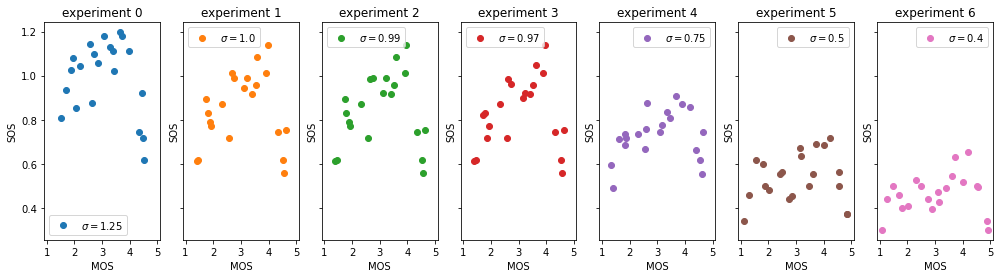

In [2]:
import matplotlib.pyplot as plt

experiments = range(len(y))

fig, ax = plt.subplots(nrows=1, ncols=len(experiments), sharey=True, sharex=True, figsize=(17, 4))

for k,i in enumerate(experiments):    
    ax[k].plot(y[i].mean(axis=0), y[i].std(axis=0), 'o', color=plt.cm.tab10(k), label=f'$\\sigma={sigmas[i]}$')
    ax[k].set_xlabel('MOS')
    ax[k].set_ylabel('SOS')
    ax[k].set_title(f'experiment {k}')
    ax[k].set_xticks(range(1,6))
    ax[k].legend()   

## Experiment Precision: Computation of the SOS parameter $a$ 
For calculating the SOS parameter $a$ of an experiment, we take the mean opinion scores $m_x$ and rating variances $v_x$ of all stimuli ($x=1,\dots,k$) of that experiment and fit the corresponding MOS--SOS curve to obtain parameter $a$. 
The SOS parameter can be directly computed via ordinary least-squares (OLS) regression, see [Formal Definition of QoE Metrics (2016)](https://doi.org/10.48550/arXiv.1607.00321) by Tobias Hossfeld, Poul E. Heegaard, Martin Varela, Sebastian Möller: 

$$
  a = \frac{\sum_{x=1}^{K} (5-m_x) \cdot (m_x-1) \cdot v_x}{\sum_{x=1}^{K} (5-m_x)^2 \cdot (m_x-1)^2}. 
$$

In our examples, there are $k=21$ test conditions. For each test condition, the mean and the variance is computed across the $n=30$ subjects.

In [3]:
def calcSOSParameterForMOSVOS(mos, vos, low=1, high=5):  
    """
    Computes the SOS parameter a for the given MOS values and the variance of the opinion scores on a rating scale from low to high.

    Parameters
    ----------
    mos : array of MOS values
        For an experiment with $k$ conditions, there are $k$ MOS values which are captured in this array. 
    vos : array of VOS values
        For an experiment with $k$ conditions, there are $k$ VOS values which are captured in this array. 
    low : float, optional
        The user ratings are provided on a rating scale with minimum value `low`. 
        The default value is `low=1` corresponding to the common 5-point ACR rating scale.
    high : float, optional
        The user ratings are provided on a rating scale with maximum value `high`. 
        The default value is `high=5` corresponding to the common 5-point ACR rating scale.

    Returns
    -------
    a: float
        Returns the SOS parameter a based on the equation above.

    """    
    zmos = (mos-low)/(high-low)
    zvar = vos/ ((high-low)**2)
    return np.sum( (zmos - zmos**2)*zvar) / (np.sum( (zmos - zmos**2)**2 )) 

However, we are not only interested in the estimated SOS parameter $a$, but also in the variance of the parameter estimate. To this end, we utilize the function [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) from Python's SciPy package. In particular, we use the parameter `absolute_sigma=True`, since the uncertainty in the data is then used in an absolute sense and the estimated parameter variance reflects the absolute value. 

*Note:* For `absolute_sigma=False`, only the relative magnitudes of the uncertainity in the data matters. The returned parameter variance is based on scaling by a constant factor to match the sample variance of the residuals after the fit. However, for our purposes, we want to have the variance of the parameter estimate itself and therefore use `absolute_sigma=True`.

In [4]:
from scipy.optimize import curve_fit

def experiment_precision_sos(experiment1):
    """
    Estimates the SOS parameter a and its standard error for a subjective experiment.

    Parameters
    ----------
    experiment1 : n x k matrix of user ratings in one experiment with n subjects and k stimuli / test conditions
        An experiment is described by the matrix of user ratings (for n subjects and for k stimuli). Row i reflects ratings for stimuli i.
    
    Returns
    -------
    sosa : float
        Estimate of the SOS parameter a.  
    stderr : float
        Standard error of the SOS parameter estimation.
    n : integer
        Number of test conditions (i.e. data points) of the estimation

    """
    
    def vos_fun(mos, a):
        return a * (5-mos)*(mos-1)

    mos, vos = experiment1.mean(axis=0), experiment1.var(axis=0)
    popt, pcov = curve_fit(vos_fun, mos, vos, bounds=(0, 1.0), absolute_sigma =True)
    stderr = np.sqrt(pcov[0][0])
    sosa = popt[0]
    n = len(mos)
    return sosa, stderr, n

#### Plotting the experiment precision based on SOS parameter $a$
For the defined experiments, we are plotting the MOS-SOS curves based on the estimated SOS parameter $a$.

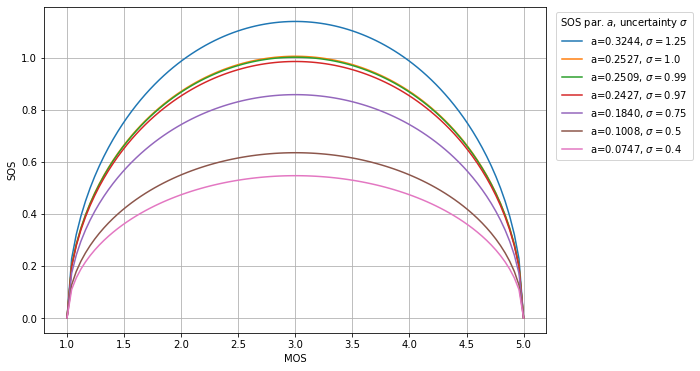

In [5]:
plt.figure(figsize=(9, 6), clear=True)
for i in range(len(y)):
    a1 = calcSOSParameterForMOSVOS(y[i].mean(axis=0), y[i].var(axis=0))
    x = np.linspace(1,5,100)
    plt.plot(x, np.sqrt(a1*(5-x)*(x-1)), '-', color=plt.cm.tab10(i), label=f'a={a1:.4f}, $\\sigma={sigmas[i]}$');
plt.xlabel('MOS')    
plt.ylabel('SOS')    
plt.legend(title='SOS par. $a$, uncertainty $\\sigma$', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(which='major');

In addition, the standard error of the SOS parameter estimate is given.

In [6]:
import pandas as pd
from IPython import display

sosa = np.array([experiment_precision_sos(yi) for yi in y])
df = pd.DataFrame({'experiment':np.arange(len(y)), 
                  'sigma': sigmas, 'estimated SOS a':sosa[:,0], 'std. err. of estimate':sosa[:,1]})
display.display(df)

,experiment,sigma,estimated SOS a,std. err. of estimate
0,0,1.25,0.324405,0.068017
1,1,1.00,0.252686,0.071500
2,2,0.99,0.250883,0.071544
3,3,0.97,0.242710,0.071787
4,4,0.75,0.184026,0.073177
5,5,0.50,0.100760,0.074602
6,6,0.40,0.074701,0.075500


## Experiment precision comparison methods based on SOS parameter $a$
For the comparison of the experiment precision of two experiments, we use an independent two-sample t-test for the SOS parameter estimate `sosa1` and `sosa2` of the corresponding experiments `experiment1` and `experiment2`. We test for the null hypothesis that two independent samples have identical average (expected) values. To be more precise, we perform Welch’s t-test, which does not assume equal population variance. A two-sided hypothesis is used in order to investigate if the means of the distributions are unequal. Our computation is based on Python’s SciPy function [ttest_ind_from_stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html).


In [7]:
import scipy.stats

def pvalSOS(experiment1, experiment2, verbose=False, returnvals=False):
    """
    Computes the p-value for the comparison of the SOS parameters of two experiments using a t-test.

    Parameters
    ----------
    experiment1 : n x k matrix of user ratings in one experiment with n subjects and k stimuli / test conditions
        An experiment is described by the matrix of user ratings (for n subjects and for k stimuli). Row i reflects ratings for stimuli i.
    experiment2 : n x k matrix of user ratings in one experiment with n subjects and k stimuli / test conditions
        An experiment is described by the matrix of user ratings (for n subjects and for k stimuli). Row i reflects ratings for stimuli i.
    verbose : boolean, optional
        If True, some output is printed. The default is False.
    returnvals : boolean, optional
        If true, the calculated SOS parameters will be returned. The default is False.

    Returns
    -------
    pvalue: float
        Returns the p-value, if the two SOS parameters for both experiments are similar.
        If the p-value is less than 0.05, the null hypothesis is rejected that there's no difference between the two SOS parameters. Hence, the SOS parameters are statistically sigificantly different.
        If the p-value is larger than 0.05, there is no significant difference between the SOS parameters.

    """        
        
    sosa1, stderr1, n1 = experiment_precision_sos(experiment1)        
    sosa2, stderr2, n2 = experiment_precision_sos(experiment2)    
         
    # from scipy.stats import ttest_ind_from_stats
    res = scipy.stats.ttest_ind_from_stats(sosa1, stderr1, n1, sosa2, stderr2, n2, equal_var=False)         
    
    if verbose: 
        print(f'sos_a1 = {sosa1:.4f} with CIs ({sosa1-stderr1:.4f},{sosa1+stderr1:.4f})')
        print(f'sos_a2 = {sosa2:.4f} with CIs ({sosa2-stderr2:.4f},{sosa2+stderr2:.4f})')
        if res.pvalue<0.05:
            print(f'p={res.pvalue:.2e} - SOS parameters are significantly different: {sosa1:.4f} != {sosa2:.4f}')
        else:
            print(f'p={res.pvalue:.2e} - Similar SOS parameters {sosa1:.4f} ~ {sosa2:.4f}')
            
    if returnvals:
        return res.pvalue, sosa1, sosa2
    else:
        return res.pvalue

#### Experiment precision comparison for the provided experiments
Now, we are comparing all pairs of experiments.

In [8]:
# Compute the p-values for the comparison for all pairs of experiments
pval = np.zeros((len(sigmas),len(sigmas)))

for i in range(len(sigmas)):
    for j in range(i+1,len(sigmas)):        
        pval[i,j] = pvalSOS(y[i], y[j], verbose=False)  
        pval[j,i] = pval[i,j]
        
# Some examples
for (i,j) in [(0,1), (1,2), (1,3)]:
    print('----------------------------------------------------------')
    print(f'Experiment{i} vs. Experiment{j}')
    print(f'sigma1={sigmas[i]:.2f} vs. sigma2={sigmas[j]:.2f}')
    a1 = calcSOSParameterForMOSVOS(y[i].mean(axis=0), y[i].var(axis=0))
    a2 = calcSOSParameterForMOSVOS(y[j].mean(axis=0), y[j].var(axis=0))
    print(f'Direct computation (OLS): sosa1={a1:.4f} vs sosa2={a2:.4f}')
    pvalSOS(y[i], y[j], verbose=True)        

----------------------------------------------------------
Experiment0 vs. Experiment1
sigma1=1.25 vs. sigma2=1.00
Direct computation (OLS): sosa1=0.3244 vs sosa2=0.2527
sos_a1 = 0.3244 with CIs (0.2564,0.3924)
sos_a2 = 0.2527 with CIs (0.1812,0.3242)
p=1.88e-03 - SOS parameters are significantly different: 0.3244 != 0.2527
----------------------------------------------------------
Experiment1 vs. Experiment2
sigma1=1.00 vs. sigma2=0.99
Direct computation (OLS): sosa1=0.2527 vs sosa2=0.2509
sos_a1 = 0.2527 with CIs (0.1812,0.3242)
sos_a2 = 0.2509 with CIs (0.1793,0.3224)
p=9.35e-01 - Similar SOS parameters 0.2527 ~ 0.2509
----------------------------------------------------------
Experiment1 vs. Experiment3
sigma1=1.00 vs. sigma2=0.97
Direct computation (OLS): sosa1=0.2527 vs sosa2=0.2427
sos_a1 = 0.2527 with CIs (0.1812,0.3242)
sos_a2 = 0.2427 with CIs (0.1709,0.3145)
p=6.54e-01 - Similar SOS parameters 0.2527 ~ 0.2427


#### Plotting significicant differences
Now, we are plotting if there are significant differences between two experiments.

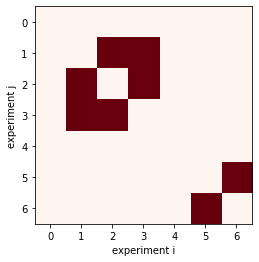

Similar experiments and their SOS parameters
Experiment1 (sigma1=1.00) vs. Experiment2 (sigma2=0.99)
Experiment1 (sigma1=1.00) vs. Experiment3 (sigma3=0.97)
Experiment2 (sigma2=0.99) vs. Experiment3 (sigma3=0.97)


In [9]:
plt.imshow(pval>0.05,  cmap=plt.cm.Reds)
plt.xticks(np.arange(len(sigmas)))
plt.yticks(np.arange(len(sigmas)));
plt.xlabel('experiment i')
plt.ylabel('experiment j')
plt.show();

# Print similar experiments
print('Similar experiments and their SOS parameters')
for i in range(len(sigmas)):
    for j in range(i+1,len(sigmas)):      
        
        if pval[i,j]>0.5:
            print(f'Experiment{i} (sigma{i}={sigmas[i]:.2f}) vs. Experiment{j} (sigma{j}={sigmas[j]:.2f})')            

Displaying the p-values of the experiment comparison.

In [10]:
df = pd.DataFrame(pval)

def highlight_cells(val):
    color = 'yellow' if val >0.5 else ''
    return 'background-color: {}'.format(color)

df.style.applymap(highlight_cells)

,0,1,2,3,4,5,6
0,0.000000,0.001875,0.001486,0.000505,0.000000,0.000000,0.000000
1,0.001875,0.000000,0.935321,0.654283,0.003782,0.000000,0.000000
2,0.001486,0.935321,0.000000,0.713660,0.004709,0.000000,0.000000
3,0.000505,0.654283,0.713660,0.000000,0.012263,0.000000,0.000000
4,0.000000,0.003782,0.004709,0.012263,0.000000,0.000748,0.000025
5,0.000000,0.000000,0.000000,0.000000,0.000748,0.000000,0.267253
6,0.000000,0.000000,0.000000,0.000000,0.000025,0.267253,0.000000
